# Final IBM Capstone Project

*Welcome to the final IBM Capstone Project. 
Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve. 

## A. Introduction 
#### *Discuss the business problem and who would be interested in this project

### Opening a Chinese Restaurant in Toronto, Canada 
The provincial capital of Ontario. With a recorded population of 2,731,571 in 2016, it is the most populous city in Canada and the fourth most populous city in North America. Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world.

Chinese food is a great, delectable meal! Starting a restaurant with a recognized and popular cuisine can have great potential.  

We will analyze the neighborhoods in Toronto to identify the most profitable area based on population density and ethnicity diversity. Toronto is a great place to start the restaurant, but we just need to make sure whether it is a profitable idea or not.

### Target Audience
- Business personal who are looking to open a restaraunt in Toronto
- Investors looking for a potentially successful restauraunt
- Freelancers looking to start a franchise 
- Data Scientists who wish to analyze Toronto's neighborhoods 
- New visitors to Toronto who love to eat sushi often 

## B. Data
#### *Describe the data that will be used to solve the problem and the source of the data.

### B.1 Data Sources

a. Toronto's Neighborhood information such as 
- Postal Codes
- Boroughs
- Neighborhood Names 
Source: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

b. Toronto's Neighborhood Geographical Information
- Latitude 
- Longitude
Source: https://cocl.us/Geospatial_data

c. Population Distribution by Ethnic Diversity 
- Ethnic Origin 
Source: https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity)

d. Toronto's Venues Locations, Names, Categories, Location (in Latitude and Longitude) 
via Foursquare's explore API 
Source: https://developer.foursquare.com

#### Explanation: 
By combining all of these data sources, we can create a data summary that will allow target audiences to make the best educated decision for their restaurant location.

### B.2 Data Frame 

#### B.2.a. Toronto's Neighborhood information

Goal: Create a Data Frame with the following columns:
- Postal Code
- Borough
- Neighborhood 

*Note
- *Only the cells that have an assigned borough will be processed. Borough that is not assigned are ignored.
- *More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
- *If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [1]:
import pandas as pd
import numpy as np
import wikipedia as wp

In [2]:
#Install Dependencies 
!pip install wikipedia

In [3]:
#Download Source from Wikipedia
source = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(source, header = 0)[0]

#Data Sample
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
#Data Cleaning Part 1: Unassigned Boroughs will be ignored
df = df[df.Borough != 'Not assigned']
df = df.rename(columns={'Postcode': 'Postal Code'})

#Data Cleaning Part 2: Unassigned Neighborhoods will share same name as their Assigned Boroughs
for index, row in df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']
        
#Data Cleaning Part 3: Place Multiple Neighborhoods in one Borough         
df = df.groupby(['Borough', 'Postal Code'])['Neighborhood'].apply(list).apply(
    lambda x:', '.join(x)).to_frame().reset_index()

#Data Sample 
df.head()

,Borough,Postal Code,Neighborhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


#### B.2.b. Toronto's Neighborhood Geographical Information

Goal: Add to the Data Frame (Postal Code, Borough, Neighborhood) with the following columns:
- Latitude
- Longitude

In [5]:
#Download Dependencies 
import io
import requests

#Extract data from csv file 
url = "https://cocl.us/Geospatial_data"
geo_list = requests.get(url).text
geo_list_df=pd.read_csv(io.StringIO(geo_list))

In [6]:
#Data Sample 
geo_list_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [7]:
#Merge Dataframe (DF) [Postal Code, Borough, Neighborhood] + Dataframe (GeoList) [Latitude, Longitude]
toronto_DF = pd.merge(df,geo_list_df, on='Postal Code')

#Change Neighbo'u'rhood to Neighborhood 
toronto_DF = toronto_DF.rename(columns={'Neighbourhood':'Neighborhood'})

In [8]:
#Data Sample 
toronto_DF.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160


#### B.2.c. Population Distribution by Ethnic Diversity 

Goal: Obtain data of each neighborhood's population in term of ethnic diversity and transfer it into the Jupyter notebook.By seeing each federal electoral districts, we can see the most populous ethnic group in each riding (AKA Neighborhood). 

In [9]:
#overall population distribution 
source = wp.page("Demographics of Toronto").html().encode("UTF-8")

In [10]:
#TORONTO & EAST YORK population distribution by ethnicity 
TEY_population_df = pd.read_html(source, header = 0)[12]
TEY_population_df = TEY_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %',
                                                     '%.8':'Ethnic Origin 9 in %'})

In [11]:
#TORONTO & EAST YORK
TEY_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,Ethnic Origin 9 in %
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#NORTH YORK population distribution by ethnicity 
North_population_df = pd.read_html(source, header = 0)[13]
North_population_df = North_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})

In [13]:
#NORTH YORK 
North_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [14]:
#SCARBOROUGH population distribution by ethnicity 
Scar_population_df = pd.read_html(source, header = 0)[14]
Scar_population_df = Scar_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})

In [15]:
#SCARBOROUGH 
Scar_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#ETOBICOKE & YORK population distribution by ethnicity 
ETY_population_df = pd.read_html(source, header = 0)[15]
ETY_population_df = ETY_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})

In [17]:
#ETOBICOKE & YORK 
ETY_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### B.2.d. Toronto's Venues Locations, Names, Categories, Location (in Latitude and Longitude) 
#### via Foursquare's explore API 

Using FourSquare API, we can find explore neighborhoods in Toronto and what kind of venues reside in each neighborhood. 

In [18]:
#Install Dependencies 
!pip install geopy
from geopy.geocoders import Nominatim 

In [19]:
#Use geopy library to get the latitude and longitude values of Toronto 
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [20]:
#Folium is a great visualization library. 
#It has the ability zoom in/out of map, and click on each circle mark to reveal the name of the 
#neighborhood and its respective borough.

!pip install folium
import folium 

In [21]:
#We are using a 1 Km Radius 
# Punch in my Foursquare Information
CLIENT_ID = 'QEF4SFROUUVOQKNPAFNNRDUW4ACAWSYYG312LM3BKEDDKPIZ' 
CLIENT_SECRET = 'CCBFW1WDVTUYDLPFX3SR0QBB5R2UKRYOZ3F1JDJ3PLQMPDRM' 
VERSION = '20180604'

!pip install requests 
!pipenv install requests
import requests

radius=1000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius)
results = requests.get(url).json()



def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

/usr/bin/sh: pipenv: command not found


In [22]:
#The API returned a JSON file. 
#Now we turn it into a pandas data frame. 

In [23]:
#Install Dependencies 
import json
from pandas.io.json import json_normalize

#Panda Data Frame 
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [24]:
#Data Sample 
nearby_venues.head()

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Indigo,Bookstore,43.653515,-79.380696
3,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684
4,Textile Museum of Canada,Art Museum,43.654396,-79.386500


In [25]:
#Continue to look for nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
#Im going to look for the Top 100 venues 
LIMIT = 100
toronto_venues = getNearbyVenues(names=toronto_DF['Neighborhood'],
                                   latitudes=toronto_DF['Latitude'],
                                   longitudes=toronto_DF['Longitude'])

Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Queen's Park, Ontario Provincial Government
The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Business reply mail Processing Centre, South Central Letter 

In [27]:
#Data Sample 
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
2,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
3,Davisville North,43.712751,-79.390197,Sherwood Park,43.716551,-79.387776,Park
4,Davisville North,43.712751,-79.390197,Summerhill Market North,43.715499,-79.392881,Food & Drink Shop


In [28]:
#I want to see how many existing Venue Categories (e.g. Park, Swim School, Hotel, Gym, etc)
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Berczy Park,58,58,58,58,58,58
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",19,19,19,19,19,19


In [29]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 268 uniques categories.


In [30]:
#Calculate the mean of all venue groupby in each neighborhood
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,"Alderwood, Long Branch",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,Bayview Village,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,"Bedford Park, Lawrence Manor East",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.041667,...,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00,0.017241,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,"Birch Cliff, Cliffside West",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,"Business reply mail Processing Centre, South C...",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0,0.000000,0.066667,0.066667,0.133333,0.2,0.066667,0.000000,...,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [31]:
#Let's see how many categories there are
print (toronto_venues['Venue Category'].value_counts())

Coffee Shop                        176
Café                                97
Restaurant                          66
Pizza Place                         52
Park                                50
Italian Restaurant                  45
Sandwich Place                      43
Bakery                              42
Japanese Restaurant                 42
Hotel                               41
Clothing Store                      36
Gym                                 34
Bar                                 31
Sushi Restaurant                    30
Grocery Store                       28
American Restaurant                 26
Fast Food Restaurant                25
Pub                                 25
Bank                                25
Thai Restaurant                     22
Breakfast Spot                      22
Seafood Restaurant                  21
Pharmacy                            21
Ice Cream Shop                      19
Diner                               18
Gastropub                

## C. Methodology 
#### *Represents the main component of the report where you discuss
#### Describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

### C. Methodology: Exploratory Data Analysis 

### C.1 Folium
- Folium is a great visualization python library . 
- It has the ability zoom in/out of map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

Goal: Create a interactive leaflet map using our coordinate data 

In [32]:
# create map of Toronto using latitude and longitude
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_DF['Latitude'], toronto_DF['Longitude'], toronto_DF['Borough'], toronto_DF['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### C.2 Relationship between Neighborhood and Chinese Restaurant 


#### C.2.a Data Frame 
Goal: Add to our dataframe (Borough, Postal Code, Neighborhood, Latitude, Longitude) with the following columns: 
- Cluster Labels 
- Chinese Restaurant (the mean of venue groupby) 

In [33]:
#Create a Dataframe with the columns : Neighborhood, Chinese Restaurant 
toronto_part = toronto_grouped[['Neighborhood', 'Chinese Restaurant']]
#Data Sample
toronto_part.head()

,Neighborhood,Chinese Restaurant
0,Agincourt,0.00
1,"Alderwood, Long Branch",0.00
2,"Bathurst Manor, Wilson Heights, Downsview North",0.00
3,Bayview Village,0.25
4,"Bedford Park, Lawrence Manor East",0.00


In [34]:
#Add Dataframe (Toronto Part)[Neighborhood, Chinese Restaurant] to 
# Dataframe(Toronto DF)[Borough, Postal Code, Neighborhood, Latitude, Longitude]
toronto_merged = pd.merge(toronto_DF, toronto_part, on='Neighborhood')
#Data Sample
toronto_merged

,Borough,Postal Code,Neighborhood,Latitude,Longitude,Chinese Restaurant
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,0.000000
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,0.000000
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,0.055556
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,0.000000
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,0.000000
5,Central Toronto,M4V,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0.000000
6,Central Toronto,M5N,Roselawn,43.711695,-79.416936,0.000000
7,Central Toronto,M5P,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307,0.000000
8,Central Toronto,M5R,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,0.000000
9,Downtown Toronto,M4W,Rosedale,43.679563,-79.377529,0.000000


#### C.2.b Bar Charts 
Goal: Identify which specific neighborhoods have the highest mean of chinese restaurants 

In [ ]:
#Create Plot with Neighborhood vs. Chinese Restaurant (Mean)
#fig = plt.figure(figsize=(19,9))

#sns.set(font_scale=1.1)
#sns.violinplot(y="Chinese Restaurant", x="Borough", data=toronto_merged, cut=0);

#plt.title('Mean of Chinese restaurants in each Borough (Toronto, Canada)', fontsize=15)
#plt.show()

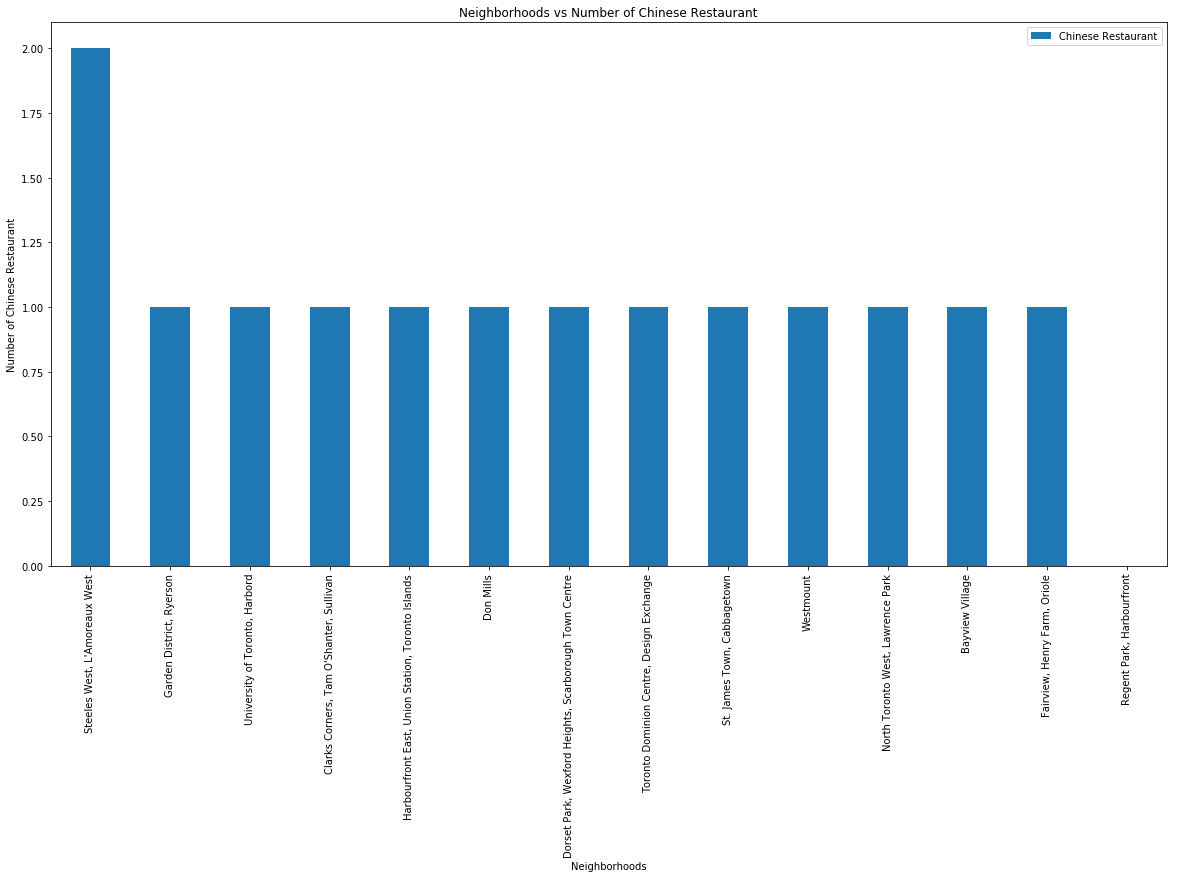

In [36]:
#With boroughs visualized, now we will continue with Neighborhood

import matplotlib.pyplot as plt

graph = pd.DataFrame(toronto_onehot.groupby('Neighborhood')['Chinese Restaurant'].sum())
graph = graph.sort_values(by ='Chinese Restaurant', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(20,10))
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Chinese Restaurant")
plt.title("Neighborhoods vs Number of Chinese Restaurant")
plt.show()

### C.3 Relationship between Neighborhood and Chinese Population
Fun Fact 1: The Chinese Population Group made up for 11.1% of Toronto's total population (in 2016)
Fun Fact 2: A Riding is an electoral district in Canada (also known as a "constituency"). It is a geographical constituency upon which Canada's representative democracy is based. 
In our case, a Riding can contain more than one neighborhood. 

Goal: Identify which specific ridings have the highest ethnic percentage. 

In Section B.2.c. Population Distribution by Ethnic Diversity, we created four dataframes for each federal electoral district:
- #TORONTO & EAST YORK (TEY_population_df)
- #NORTH YORK (North_population_df)
- #SCARBOROUGH (Scar_population_df)
- #ETOBICOKE & YORK (ETY_population_df)

#### C.3.a Dataframe 
Goal: Simplify and create new dataframe with the following columns:
Ridings, Chinese Population

In [37]:
#Merge all four dataframes 
ET = ETY_population_df.append(TEY_population_df,sort=True).reset_index()
ET.drop('index',axis=1,inplace=True)
SN = North_population_df.append(Scar_population_df,sort=True).reset_index()
SN.drop('index',axis=1,inplace=True)
pop_ethnic_df = SN.append(ET,sort=True).reset_index()
pop_ethnic_df.drop('index',axis=1,inplace=True)
pop_ethnic_df = pop_ethnic_df[['Riding', 
                               'Population',
                               'Ethnic Origin #1', 'Ethnic Origin 1 in %',
                               'Ethnic Origin #2', 'Ethnic Origin 2 in %',
                               'Ethnic Origin #3', 'Ethnic Origin 3 in %',
                               'Ethnic Origin #4', 'Ethnic Origin 4 in %',
                               'Ethnic Origin #5', 'Ethnic Origin 5 in %', 
                               'Ethnic Origin #6', 'Ethnic Origin 6 in %',
                               'Ethnic Origin #7', 'Ethnic Origin 7 in %',
                               'Ethnic Origin #8', 'Ethnic Origin 8 in %',
                               'Ethnic Origin #9', 'Ethnic Origin 9 in %', ]]

#Now we have a dataframe with important columns: 
#Riding, Population, Ethnic Origin # in Percentage
pop_ethnic_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,Ethnic Origin 9 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.50,Irish,9.2,Russian,8.4,NaN,NaN
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.00,Filipino,7.8,NaN,NaN,NaN,NaN
7,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.00,NaN,NaN,NaN,NaN,NaN,NaN
8,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.20,Chinese,7.2,NaN,NaN,NaN,NaN
9,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#We're going to create a new dataframe(pop_chinese_df) 
#where the Ethnic Origin (from #1-#9) has at least one "Chinese" group
temp = pop_ethnic_df.loc[(pop_ethnic_df['Ethnic Origin #1'] == 'Chinese')| 
                                      (pop_ethnic_df['Ethnic Origin #2'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #3'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #4'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #5'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #6'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #7'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #8'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #9'] == 'Chinese')]
pop_chinese_df = pd.DataFrame(temp).reset_index()
pop_chinese_df.drop('index',axis=1,inplace=True)

#Data Sample 
pop_chinese_df.head()

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,Ethnic Origin 9 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN,NaN,NaN
4,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#Simplify our previous dataframe into the following columns: 
#Ethnicity, Percentage, Population, Riding
columns_list = pop_chinese_df.columns.to_list()
pop_chinese_DF_with_percent = pd.DataFrame()

del columns_list[0]
del columns_list[0]

for i in range(0,pop_chinese_df.shape[0]):
    for j in columns_list:
        print(j)
        if pop_chinese_df.at[i, j] == 'Chinese':
            k = columns_list.index(j) + 1
            percent_col = columns_list[k]
            pop_chinese_DF_with_percent = pop_chinese_DF_with_percent.append(
                {'Riding':pop_chinese_df.at[i, 'Riding'], 
                 'Population':pop_chinese_df.at[i, 'Population'], 
                 'Ethnicity': pop_chinese_df.at[i, j], 
                 'Percentage': pop_chinese_df.at[i, percent_col]},
                  ignore_index=True)

#Data Sample 
#Should be having only Chinese Ethnicity with their respective percentage, population and riding 
pop_chinese_DF_with_percent.head()

Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #9
Ethnic Origin 9 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #9
Ethnic Origin 9 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origi

,Ethnicity,Percentage,Population,Riding
0,Chinese,25.9,117405.0,Willowdale
1,Chinese,32.4,109060.0,Don Valley North
2,Chinese,11.2,101790.0,Don Valley West
3,Chinese,8.9,93170.0,Don Valley East
4,Chinese,10.7,110450.0,Scarborough Centre


In [40]:
#Simplify our previous dataframe into the following columns: 
#Population, Riding
pop_chinese_DF_with_percent['Chinese Population'] = (pop_chinese_DF_with_percent['Percentage'] * pop_chinese_DF_with_percent['Population'])/100
pop_chinese_DF_with_percent.drop(columns={'Percentage','Population','Ethnicity'},axis=1, inplace =True)
pop_chinese_DF_with_percent.drop_duplicates(keep='first',inplace=True) 

#Data Sample
pop_chinese_DF_with_percent.head()

,Riding,Chinese Population
0,Willowdale,30407.895
1,Don Valley North,35335.440
2,Don Valley West,11400.480
3,Don Valley East,8292.130
4,Scarborough Centre,11818.150


#### C.3.b Bar Plot 
Goal: Create a visual to identify the highly populated chinese neighborhoods in terms of numbers which neighborhood has the largest chinese population terms of numbers. 
    
    
This analysis & visualization of the relationship between neighborhoods & indian population present in those neighborhoods helps us in identifying the highly populated indian neighborhoods. Once we identify those neighborhoods it helps us in deciding where to place the new Indian restaurant. Indian restaurant placed in an densely populated Indian neighborhood is more likely to get more Indian customers than a restaurant placed in a neighborhood with less or no Indian population. Thus this analysis helps in the determining the success of the new Indian restaurant.

In [43]:
#Create Bar graph / plot 

%matplotlib inline
import matplotlib as mpl
import seaborn as sns

pop_chinese_DF_with_percent.sort_values(by='Chinese Population', ascending=False)
bar.plot(kind='bar',x='Riding', y='Chinese Population',figsize=(20,10), color='blue')
plt.title("Chinese Population in each Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Population")
plt.show()

NameError: name 'bar' is not defined

### C.4 Relationship between Chinese Population and Chinese Restaurants 

We created two dataframes from the following sections:
C.2 Relationship between Neighborhood and Chinese Restaurant 
C.3 Relationship between Neighborhood and Chinese Population 

Goal: Identify which specific neighborhoods have the highest number of chinese restaurants 

In [ ]:
#In order to change "Riding" to "Neighborhood", we have to alter the list to match the wikipedia list
#so that we can retrieve the neighborhood present in each riding
riding_list = pop_chinese_DF_with_percent['Riding'].to_list()
riding_list[riding_list.index('Scarborough Centre')] = 'Scarborough Centre (electoral district)'
riding_list[riding_list.index('Scarborough North')] = 'Scarborough North (electoral district)'
riding_list

In [ ]:
#Scraping wiki page to get the neighborhoods of ech Ridings
import wikipedia

Riding_neighborhood_df = pd.DataFrame()

for item in riding_list:
    section = wikipedia.WikipediaPage(item).section('Geography')
    start = section.index('neighbourhoods of') + 17
    stop = section.index('.',start)
    Riding_neighborhood_df = Riding_neighborhood_df.append({'Riding':item, 'Neighborhoods':section[start:stop]},ignore_index=True)
    
Riding_neighborhood_df = Riding_neighborhood_df[['Riding','Neighborhoods']]
Riding_neighborhood_df

In [ ]:
#Merge and simplify the previous dataframes 
#to create a dataframe with [Chinese Population, Neighborhoods]
#(Goodbye Ridings!)
Neigh_pop = pd.merge(pop_chinese_DF_with_percent, Riding_neighborhood_df, on='Riding')
Neigh_pop.drop(columns=['Riding'],inplace =True)

Neigh_pop['split_neighborhoods'] = Neigh_pop['Neighborhoods'].str.split(',') 
Neigh_pop.drop(columns=['Neighborhoods'],inplace=True,axis=1)
Neigh_pop = Neigh_pop.split_neighborhoods.apply(pd.Series).merge(Neigh_pop, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Chinese Population'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

Neigh_pop.reset_index()

#Data Sample
Neigh_pop.head()

In [ ]:
#Create a Data Frame with [Chinese Restaurant, Neighborhood]
toronto_part['split_neighborhoods'] = toronto_part['Neighborhood'].str.split(',') 
toronto_part.drop(columns=['Neighborhood'],inplace=True,axis=1)
toronto_part = toronto_part.split_neighborhoods.apply(pd.Series).merge(toronto_part, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Chinese Restaurant'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

toronto_part.reset_index()

#Data Sample
toronto_part.head()

In [ ]:
#Merge the previous dataframes
#to create a dataframe [Chinese Population, Chinese Restaurant, Neighborhood]
pop_merged_restaurant_percent = pd.merge(Neigh_pop, toronto_part, on='Neighborhood')

#Data Sample 
pop_merged_restaurant_percent.head()

### C. Methodology:  Inferential Statistical Testing / Predictive Modeling
In our exloratory data section, there is no giant correlation between the Chinese population & the populatiry in Chinese restaurants.

So we will look into predictive modelling and K-means clustering techniques. 

### C.5 Clustering 

#### C.5.a K-Value 
Goal: Idenfify K-value aka the number of clusters in a given dataset. 

In [ ]:
#Install Dependencies 
from sklearn.cluster import KMeans

#Use the Data Frame with [Chinese Restaurant, Neighborhood] 
toronto_part_clustering = toronto_part.drop('Neighborhood', 1)

error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(toronto_part_clustering)
    except ValueError:
        print("error on line",i)
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [ ]:
#Install Dependencies 
!conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))
visualizer.fit(toronto_part_clustering)       
visualizer.show() 

In [ ]:
#K = 6 looks like the best value 

#### C.5.b Clustering on Folium 
Goal: Visualize the clusters on the folium map 

In [ ]:
#using k = 6 
kclusters = 6
toronto_part_clustering = toronto_part.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_part_clustering)

kmeans.labels_

In [ ]:
#create dataframe for folium
toronto_part.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = toronto_DF

toronto_merged = toronto_merged.join(toronto_part.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)

toronto_merged.reset_index(drop=True, inplace=True)
toronto_merged['Cluster Labels'].astype(int)

toronto_merged.head()

In [ ]:
#create folium map 
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

#### C.5.c Examine the Clusters

In [ ]:
#Cluster 0
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

In [ ]:
# Cluster 1 contains the neighborhoods which is sparsely populated with Indian restaurants. 
# It is shown in purple color in the map.

#Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

In [ ]:
#Cluster 2 has no rows meaning no data points or neighborhood was near to this centroid.
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]


In [ ]:
# Cluster 3 contains all the neighborhoods which is medium populated with Indian restaurants. 
# It is shown in blue color in the map.

#Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

In [ ]:
#Cluster 4 has no rows meaning no data points or neighborhood was near to this centroid.
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]


In [ ]:
#Cluster 5 contains all the neighborhoods which is densely populated with Indian restaurants. 
#It is shown in Orange color in the map

#Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5]

## C.Results section where you 
#### *Discuss the results.

5.1 Results
We have reached the end of the analysis, in the result section we can document all the findinds from above clustering & visualization of the datas. In this project, as the business problem started with identifying a good neighborhood to open a new Indian restaurant, we looked into all the neighborhoods in Toronto, analysed the Indian population in each neighborhood & spread of Indian restaurants in those neighborhoods to come to conclusion about which neighborhood would be a better spot for opening a new Indian restaurant. I have used data from web resources like Wikipedia, geospatial coordinates of Toronto neighborhoods, and Foursquare API, to set up a very realistic data-analysis scenario. We have found out that —

In those 11 boroughs we identified that only Central Toronto, Downtown Tronto, East Toronto, East York, North York & Scarborough boroughs have high amount of Indian restaurants with the help of Violin plots between Number of Indian restaurants in Borough of Toronto.
In all the ridings, Scarborough-Guildwood, Scarborough-Rouge Park, Scarborough Centre, Scarborough North, Humber River-Black Creek, Don Valley East, Scarborough Southwest, Don Valley North & Scarborough-Agincourt are the densely populated with Indian crowd ridings.
With the help of clusters examing & violin plots looks like Downtown Toronto, Central Toronto, East York are already densely populated with Indian restaurants. So it is better idea to leave those boroughs out and consider only Scarborough, East Toronto & North York for the new restaurant's location.
After careful consideration it is a good idea to open a new Indian restaurant in Scarborough borough since it has high number of Indian population which gives a higher number of customers possibility and lower competition since very less Indian restaurants in the neighborhoods.

5.2 Discussion
According to this analysis, Scarborough borough will provide least competition for the new upcoming Indian restaurant as there is very little Indian restaurants spread or no Indian restaurants in neighborhoods. Also looking at the population distribution looks like it is densely populated with Indian crowd which helps the new restaurant by providing hig customer visit possibilty. So, definitely this region could potentially be a perfect place for starting a quality Indian restaurants. Some of the drawbacks of this analysis are — the clustering is completely based only on data obtained from Foursquare API. Also the Indian population distribution in each neighborhood is also based on the 2016 census which is not up-to date. Thus population distribution would have definitely changed by 2019 given 3 years gap in the data. Since population distribution of Indian crowd in each neighborhood & number of Indian restaurants are the major feature in this analysis and it is not fully up-to date data, this analysis is definitely not far from being conclusory & it has lot of areas where it can be imporved. However, it certainly provides us with some good insights, preliminary information on possibilites & a head start into this business problem by setting the step stones properly. Furthermore, this may also potentially vary depending on the type of clustering techniques that we use to examine the data.

6. Conclusion:
Finally to conclude this project, We have got a chance to on a business problem like how a real like data scientists would do. We have used many python libraries to fetch the data , to manipulate the contents & to analyze and visualize those datasets. We have made use of Foursquare API to explore the venues in enighborhoods of Toronto, then get good amount of data from Wikipedia which we scraped with help of Wikipedia python library and visualized using various plots present in seaborn & matplotlib. We also applied machine learning technique to to predict the output given the data and used Folium to visualize it on a map. Also, some of the drawbacks or areas of improvements shows us that this analysis can further be improved with help more data and different machine learning technique. Similarly we can use this project to analysis any scenario such opening a different cuisine or success of opening a new gym and etc. Hopefully, this project helps acts as initial guidance to take more complex real-life challenges using data-science.


After performing the data cleaning & data analysis we can identify that their no big relationship established in terms of the Indian population & the popular Indian restaurants.

Thus this marks end of the data cleaning & analyses step in this project. Next we will look into the predictive modeling. In the predictive modelling we are going to use Clustering techniques since this is analysis of unlabelled data. K-Means clustering is used to perform the analysis of the data at hand.

In [ ]:

toronto_part.drop('Cluster Labels',axis=1, inplace=True)

In [ ]:
Sources

https://en.wikipedia.org/wiki/Toronto
    
    